In [1]:
!pip install tensorflow-gpu==2.0.0 -q

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 41.2MB/s 
     |████████████████████████████████| 450kB 32.4MB/s 
ERROR: tensorflow 2.2.0rc1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2020-03-30 07:43:26--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  49.0MB/s    in 9.5s    

2020-03-30 07:43:36 (45.0 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [0]:
!unzip Food-5K.zip

In [13]:
!ls Food-5K

evaluation  training  validation


In [0]:
!mv Food-5K/* .

In [0]:
!ls data/train/nonfood

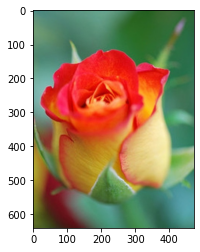

In [24]:
plt.imshow(image.load_img('training/0_808.jpg'))

In [0]:
!mkdir data

In [0]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/nonfood
!mkdir data/test/food
!mkdir data/test/nonfood

In [0]:
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food


In [0]:
#creating data paths
train_path = 'data/train'
valid_path = 'data/test'

In [0]:
#Resizing Image
Image_size = [200,200]

In [0]:
#getting the number of image files and validation files
image_files = glob(train_path + '/*/*.jpg')
valid_files = glob(valid_path + '/*/*.jpg')

In [37]:
#to get the number of classes 
folders = glob(train_path + '/*')
folders

['data/train/food', 'data/train/nonfood']

In [40]:
len(folders)

2

In [38]:
#creating an instance of a pre trained model
ptm = PretrainedModel(
    input_shape = Image_size + [3],
    weights = 'imagenet',
    include_top = False
)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
ptm.trainable = False

In [0]:
#Mapping the data into feature vectors
K = len(folders)
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [0]:
model = Model(ptm.input, x)

In [0]:
#Creating an instance of image Augmentation
gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    preprocessing_function = preprocess_input

)

In [0]:
batch_size = 128

In [48]:
#creating the train generator
train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size = Image_size,
    batch_size = batch_size
)

Found 3000 images belonging to 2 classes.


In [49]:
#creating the test generator
test_generator = gen.flow_from_directory(
    valid_path,
    batch_size = batch_size,
    target_size = Image_size
)

Found 1000 images belonging to 2 classes.


In [0]:
#compiling the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [53]:
r = model.fit(
    train_generator,
    validation_data = (test_generator),
    epochs = 10,
    steps_per_epoch = int(np.ceil(len(image_files)/ batch_size)),
    validation_steps = int(np.ceil(len(valid_files)/ batch_size))
)

ERROR! Session/line number was not unique in database. History logging moved to new session 62
Train for 24 steps, validate for 8 steps
Epoch 1/10
24/24 [==============================] - 67s 3s/step - loss: 2.0485 - accuracy: 0.9137 - val_loss: 0.7330 - val_accuracy: 0.9690
Epoch 2/10
24/24 [==============================] - 54s 2s/step - loss: 0.5913 - accuracy: 0.9740 - val_loss: 0.8843 - val_accuracy: 0.9610
Epoch 3/10
24/24 [==============================] - 54s 2s/step - loss: 0.2901 - accuracy: 0.9840 - val_loss: 0.5960 - val_accuracy: 0.9750
Epoch 4/10
24/24 [==============================] - 54s 2s/step - loss: 0.3432 - accuracy: 0.9797 - val_loss: 1.3303 - val_accuracy: 0.9550
Epoch 5/10
24/24 [==============================] - 54s 2s/step - loss: 0.1507 - accuracy: 0.9893 - val_loss: 0.8742 - val_accuracy: 0.9660
Epoch 6/10
24/24 [==============================] - 55s 2s/step - loss: 0.1491 - accuracy: 0.9880 - val_loss: 1.0458 - val_accuracy: 0.9650
Epoch 7/10
24/24 [======

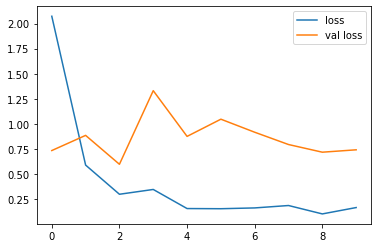

In [54]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()

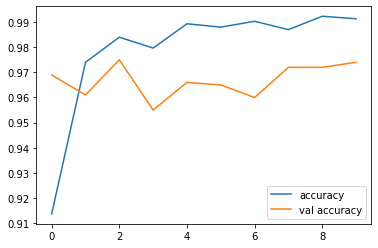

In [55]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()